In [34]:
!pip install scipy==1.6.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.9/30.9 MB 909.5 kB/s eta 0:00:0000:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1


In [12]:
import os
from github import Github
from dotenv import load_dotenv
import networkx as nx
import csv
import numpy as np
#import plt
import matplotlib.pyplot as plt

#create an empty graph
G = nx.Graph()

In [25]:
# Open the CSV file and read the data for users
with open('dataset/users.csv', 'r') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        if i == 0: # Skip the header columns
            continue
        # transform the string of repositories into an array of strings
        row[2:4] = [x.replace(' ', '').replace('[', '').replace(']', '').replace('\'', '').replace(' "', '').split(',') for x in row[2:4]]
        # Add the user node to graph with blue color
        G.add_node(row[0], name=row[1], repos=row[2], commits= row[3], color="#7FB2FD")

nx.info(G)

/var/folders/w2/jn05b8cd0kj32r1y2sywf38w0000gn/T/ipykernel_7442/349536633.py:12: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G)


'Graph with 1408 nodes and 1 edges'

In [27]:
# Open the CSV file and read the data for repositories
with open('dataset/repos.csv', 'r') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        if i == 0: # Skip the header columns
            continue

        # transform the string of languages into an array of strings
        row[2], row[5], row[6] = tuple(x.replace(' ', '').replace('[', '').replace(']', '').replace('"', '').split(',') for x in (row[2], row[5], row [6]))

        # Add the repository node to graph with pink color
        G.add_node(row[0], name=row[1], topics=row[2], n_star= row[3], n_fork= row[4], languages=row[5], p_lang= row[6], color="#FF8CCD")

nx.info(G)



/var/folders/w2/jn05b8cd0kj32r1y2sywf38w0000gn/T/ipykernel_7442/70881956.py:14: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G)


'Graph with 1408 nodes and 1 edges'

In [26]:
# Open the CSV file and read the data for languages
with open('dataset/languages.csv', 'r') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        if i == 0: # Skip the header columns
            continue
        # Add the language node to graph with green color
        G.add_node(row[0], color="#A5FFA5")

nx.info(G)



/var/folders/w2/jn05b8cd0kj32r1y2sywf38w0000gn/T/ipykernel_6346/1300986685.py:10: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G)


'Graph with 1380 nodes and 254 edges'

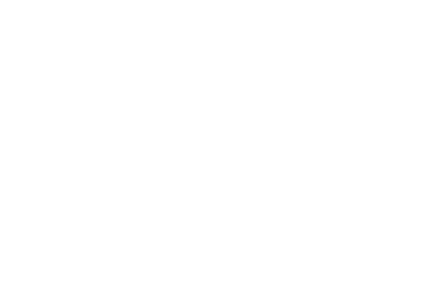

In [14]:
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold')
node_colors = [G.nodes[n]['color'] for n in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_color=node_colors)
edge_colors = ['#fffff' if G.nodes[u]['color'] == G.nodes[v]['color'] else '#e5e5e5' for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, edge_color=edge_colors)
plt.show()


In [39]:
repos_df=[]
languages_df=[]

for repo in repos:
    for lang in repo['languages']:
        G.add_edge(repo['id'], lang)

In [35]:
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color="#7FB2FD")
nx.draw_networkx_nodes(G, pos, nodelist=languages, node_color="#FF8CCD")
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)

AttributeError: module 'scipy.sparse' has no attribute 'coo_array'

In [40]:
for index, row in repos_df.iterrows():
    language_id = row['language_id']
    repo_id = row['id']
    if language_id in languages_df['id'].tolist():
        G.add_edge(language_id, repo_id

#plot the graph
nx.draw(G, with_labels=True, font_weight='bold')


SyntaxError: invalid syntax (1691767868.py, line 8)